In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [2]:
# read data
fraud_df = pd.read_csv("fraud_analyst_interview_exercise_-_v2.csv")

In [3]:
fraud_df.head()

,fraud_flag,payment_id,hashed_ip,device,version,adjusted_pmt_created_at,merchant_name,hashed_consumer_id,adjusted_acc_created_at,amount,...,hashed_consumer_email,consumer_email_domain,hashed_buyer_phone,hashed_consumer_phone,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_gender,consumer_age
0,0.0,5860,ip_3737,Android,10.0,2021-04-26 0:00:03,Red Shop,consumer_1145,2021-03-25 23:15:19,47500,...,email_6799,gmail.com,phone_7698,phone_7698,139,358,32500,7508146,NaN,65
1,0.0,2676,ip_1723,Android,10.0,2021-04-26 0:01:33,Red Shop,consumer_2022,2021-04-18 3:23:20,580,...,email_192,gmail.com,phone_3244,phone_3244,108,19,3800,8518137,Female,66
2,0.0,8153,ip_5156,Android,9.0,2021-04-26 0:04:28,Red Shop,consumer_837,2021-03-09 23:46:45,680,...,email_4991,docomo.ne.jp,phone_1389,phone_1389,112,0,0,9552346,Male,49
3,0.0,8147,ip_5156,Android,9.0,2021-04-26 0:05:20,Red Shop,consumer_837,2021-03-09 23:46:45,680,...,email_4991,docomo.ne.jp,phone_1389,phone_1389,197,0,0,9552346,NaN,57
4,0.0,1344,ip_865,iPhone OS,13.0,2021-04-26 0:05:48,Blue Shop,consumer_2336,2021-04-20 19:37:42,125400,...,email_8182,ezweb.ne.jp,phone_3618,phone_3618,13,0,0,9959594,Male,21


In [4]:
# fraud_df.describe()
fraud_df.isna().sum()

fraud_flag                 11048
payment_id                     0
hashed_ip                      0
device                        87
version                       87
adjusted_pmt_created_at        0
merchant_name                  0
hashed_consumer_id             0
adjusted_acc_created_at        0
amount                         0
hashed_buyer_email             0
buyer_email_domain             0
hashed_consumer_email          0
consumer_email_domain          0
hashed_buyer_phone             0
hashed_consumer_phone          0
consumer_phone_age             0
merchant_account_age           0
ltv                            0
hashed_zip                     0
consumer_gender             3075
consumer_age                   0
dtype: int64

## Amount of data with fraud flags and without

In [5]:
fraud_df["isflagged"]  = np.where(pd.isnull(fraud_df.fraud_flag) , "not_flagged","is_flagged")
fraud_df["count"] = 1



In [6]:
fraud_df["count"].sum()

13239

In [7]:
fraud_df["isflagged"].unique()

array(['is_flagged', 'not_flagged'], dtype=object)

In [8]:
flag_df = fraud_df.groupby("isflagged").sum().reset_index()
flag_df

,isflagged,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count
0,is_flagged,69.0,14345299,25438.0,28665899,221563,401015,7811247,11533180086,93889,2191
1,not_flagged,0.0,73296881,128744.0,141404305,1108365,2006014,37541406,58195212280,474674,11048


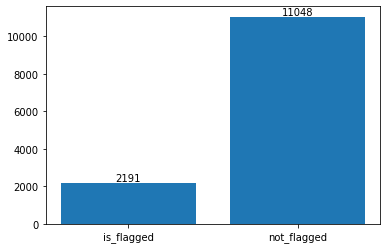

In [9]:
fig1 ,ax1 = plt.subplots()
bar = ax1.bar(flag_df["isflagged"], flag_df["count"], label=flag_df["count"])
ax1.bar_label(bar)
plt.show()


In [11]:
flag2_df = fraud_df.groupby(fraud_df.fraud_flag).sum().reset_index()
flag2_df

,fraud_flag,payment_id,version,amount,consumer_phone_age,merchant_account_age,ltv,hashed_zip,consumer_age,count
0,0.0,13762531,24936.0,28084895,214204,401015,7811247,11153640454,91064,2122
1,1.0,582768,502.0,581004,7359,0,0,379539632,2825,69


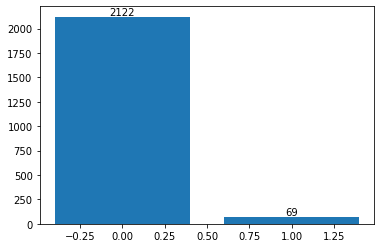

In [14]:
fig2 ,ax2 = plt.subplots()
bar2 = ax2.bar(flag2_df["fraud_flag"],
               flag2_df["count"], label=flag2_df["count"])
ax2.bar_label(bar2)
plt.show()


## data attributes of fraud flagged data

In [16]:
fraud_only = fraud_df[fraud_df.fraud_flag == 1]
len(fraud_only) #should be 69

69